# Chapter 14
## Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *

np.random.seed(0)

## Dataset

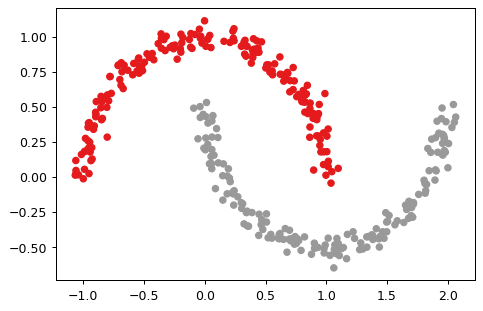

In [2]:
coord, cl = make_moons(500, noise=0.05)
X, Xt, y, yt = train_test_split(coord, cl, test_size=0.3, random_state=0)
cmap_set1 = plt.cm.Set1
_, ax = plt.subplots(dpi=90)
ax.scatter(*np.transpose(X), s=25, c=y, cmap=cmap_set1)
plt.show()

## Neural networks

In [3]:
model = Sequential(
    [
        Input(2,),
        Dense(8, activation='relu'),
        Dense(8, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid'),
    ]
)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', 'Precision'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(X, y, epochs=1000, batch_size=32, verbose=0)

In [5]:
model.evaluate(Xt, yt)
predictions = (model.predict(Xt) >= 0.5).astype(int)
test_accuracy = accuracy_score(yt, predictions)
print(f"Accuracy on test set: {test_accuracy}")

5/5 [==============================] - 0s 7ms/step - loss: 1.8353e-05 - acc: 1.0000 - precision: 1.0000
Accuracy on test set: 1.0


### Plotting the decision boundary

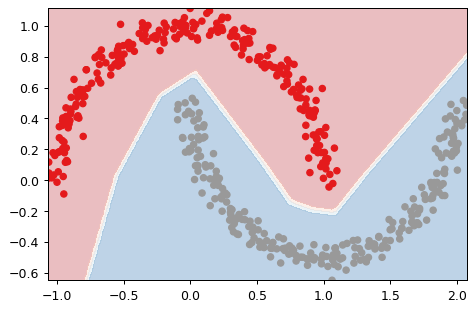

In [6]:
steps = 100
x_range = np.linspace(coord[:,0].min(), coord[:,0].max(), steps)
y_range = np.linspace(coord[:,1].min(), coord[:,1].max(), steps)

xx, yy = np.meshgrid(x_range, y_range)
xy = np.stack([np.ravel(xx), np.ravel(yy)], axis=1)
pp = model.predict(xy)
pp = pp.reshape(yy.shape)

cmap_rb = plt.get_cmap('RdBu')
_, ax = plt.subplots(dpi=90)
ax.contourf(xx, yy, pp, cmap=cmap_rb, alpha=0.3, levels=3)
ax.scatter(*np.transpose(coord), s=25, c=cl, cmap=cmap_set1)
plt.show()

### Convolutional neural networks

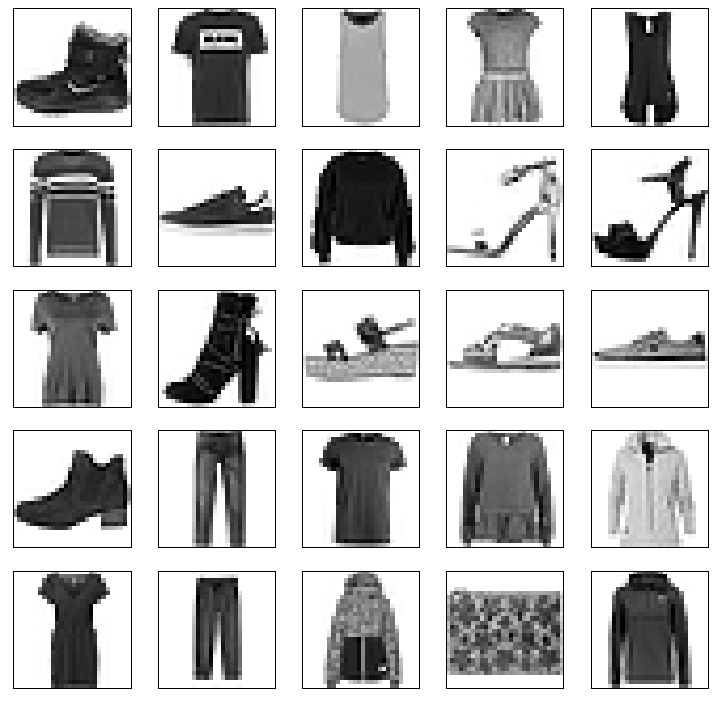

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
class_names = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

plt.subplots(5, 5, figsize=(10, 10), dpi=90)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[y_train[i]], c='white')
plt.show()

In [8]:
num_of_classes = 10
x_train = (x_train / 255).reshape(-1, 28, 28, 1)
x_test = (x_test / 255).reshape(-1, 28, 28, 1)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [9]:
model = Sequential(
    [
        Input(shape=(28, 28, 1)),
        Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu'),
        Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Flatten(),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(num_of_classes, activation='softmax')
    ]
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',
                                                                                 keras.metrics.Precision(class_id=1),
                                                                                 keras.metrics.Recall(class_id=1)])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                294944    
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                      

In [10]:
model.fit(x_train, y_train, batch_size=64, epochs=11, validation_split=0.2)
print("Accuracy: {1}\nPrecision: {2}\nRecall: {3}\nLoss: {0}".format(*model.evaluate(x_test, y_test, verbose=0)))

Epoch 1/11
750/750 [==============================] - 12s 13ms/step - loss: 0.5281 - acc: 0.8152 - precision: 0.9776 - recall: 0.9278 - val_loss: 0.3515 - val_acc: 0.8705 - val_precision: 0.9872 - val_recall: 0.9602
Epoch 2/11
750/750 [==============================] - 9s 12ms/step - loss: 0.3398 - acc: 0.8795 - precision: 0.9851 - recall: 0.9666 - val_loss: 0.2831 - val_acc: 0.8981 - val_precision: 0.9957 - val_recall: 0.9544
Epoch 3/11
750/750 [==============================] - 9s 12ms/step - loss: 0.2898 - acc: 0.8968 - precision: 0.9898 - recall: 0.9739 - val_loss: 0.2608 - val_acc: 0.9057 - val_precision: 0.9915 - val_recall: 0.9701
Epoch 4/11
750/750 [==============================] - 9s 12ms/step - loss: 0.2501 - acc: 0.9102 - precision: 0.9909 - recall: 0.9804 - val_loss: 0.2428 - val_acc: 0.9122 - val_precision: 0.9794 - val_recall: 0.9842
Epoch 5/11
750/750 [==============================] - 9s 12ms/step - loss: 0.2239 - acc: 0.9204 - precision: 0.9891 - recall: 0.9802 - val_

### LSTMs

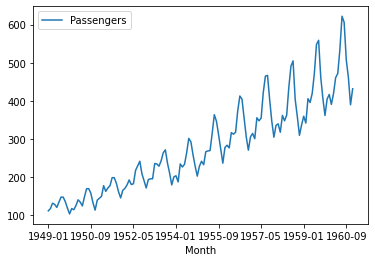

In [11]:
passengers = pd.read_feather('../datasets/air_passengers.feather').set_index('Month')
passengers.plot()
plt.show()

In [12]:
lookback = 12
sequence = pd.DataFrame({'shift_'+str(s): passengers['Passengers'].shift(s)
                         for s in range(lookback+1)})[lookback:]

y, X = sequence.iloc[:, 0], sequence.iloc[:, 1:]
max_value = np.max(y)
y /= max_value
X /= max_value

shape = list(X.shape)
shape.insert(1, 1)
X = X.values.reshape(shape)

y_train, y_test = y[:-24], y[-24:]
X_train, X_test = X[:-24], X[-24:]

In [13]:
model = Sequential(
    [
        LSTM(units=4, input_shape=(1, lookback)),
        Dense(4, activation='relu'),
        Dense(1)
    ]
)

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 272       
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=300, batch_size=8, shuffle=True, verbose=0)

RMSE for test set: 31.6


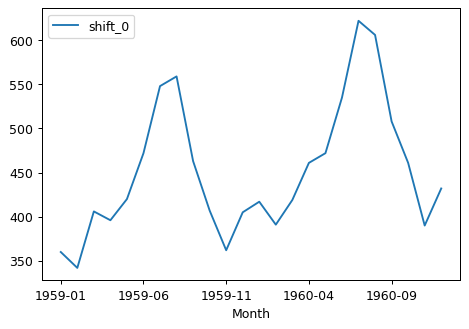

In [15]:
preds = model.predict(X_test) * max_value
reals = y_test * max_value

rmse = np.sqrt(mean_squared_error(y_pred=preds, y_true=reals))
print(f"RMSE for test set: {rmse:0.3}")

_, ax = plt.subplots(dpi=90)
reals.plot()
ax.legend()
plt.show()